<a href="https://colab.research.google.com/github/nishultomar/Python-use-case/blob/data-science/KNN_using_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# Load libraries
import pandas
import matplotlib.pyplot as plt



# Load dataset
url = "http://datasciencemastery.in/wp-content/uploads/2018/07/Iris_training_dataset.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

print (dataset.shape,'\n')
print (dataset.head(),'\n')
print(dataset.describe(),'\n')
print(dataset.groupby('class').size())

(146, 5) 

   sepal-length  sepal-width  petal-length  petal-width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa 

       sepal-length  sepal-width  petal-length  petal-width
count    146.000000   146.000000    146.000000   146.000000
mean       5.850685     3.052740      3.780822     1.209589
std        0.832300     0.435842      1.760812     0.762783
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000 

class
Iris-setosa        48
Iri

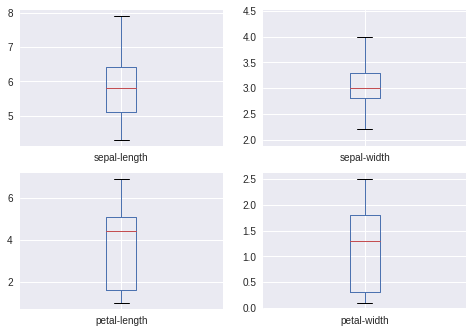

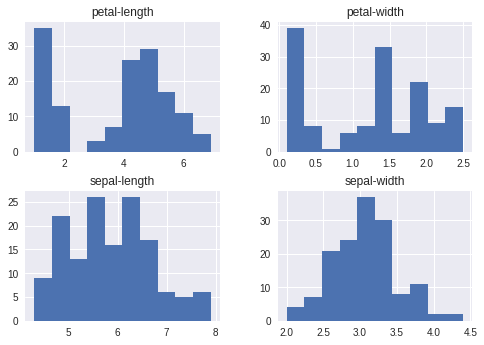

In [0]:
# box and whisker plots

# https://www.khanacademy.org/math/probability/data-distributions-a1/box--whisker-plots-a1/v/constructing-a-box-and-whisker-plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

dataset.hist()
plt.show()

In [0]:
array = dataset.values

X = array[:,0:4]    #features
Y = array[:,4]      #labels 

#print X



In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, make_scorer




model = KNeighborsClassifier()


# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
#print 'range',k_range
#print


# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary

param_grid = dict(n_neighbors=k_range)
#print 'paramgrid', param_grid




#Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. 
# For example in a binary classification problem where each class comprises 50% of the data, 
#it is best to arrange the data such that in every fold, each class comprises around half the instances.

kfolds = StratifiedKFold(10)
grid = GridSearchCV(model, param_grid, cv=kfolds.split(X,Y), scoring= 'accuracy')
grid.fit(X,Y)




GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f7e635d48e0>,
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
# examine the first tuple
# we will slice the list and select its elements using dot notation and []


#print('Parameters')
#print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
#print('')
#print('CV Validation Score')
#print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
#print('')
#print('Mean Validation Score')
#print(grid.grid_scores_[0].mean_validation_score)

print ('----------')
for val in grid.grid_scores_:
  print ('parameter {}  mean score {}'.format(val.parameters,val.mean_validation_score))
  print ('cv_validation_scores {} \n'.format(val.cv_validation_scores))
  print ('-------------')

----------
parameter {'n_neighbors': 1}  mean score 0.958904109589041
cv_validation_scores [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 1.         1.         1.        ] 

-------------
parameter {'n_neighbors': 2}  mean score 0.952054794520548
cv_validation_scores [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 0.93333333 1.         1.        ] 

-------------
parameter {'n_neighbors': 3}  mean score 0.9657534246575342
cv_validation_scores [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ] 

-------------
parameter {'n_neighbors': 4}  mean score 0.9657534246575342
cv_validation_scores [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ] 

-------------
parameter {'n_neighbors': 5}  mean score 0.9657534246575342
cv_validation_scores [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

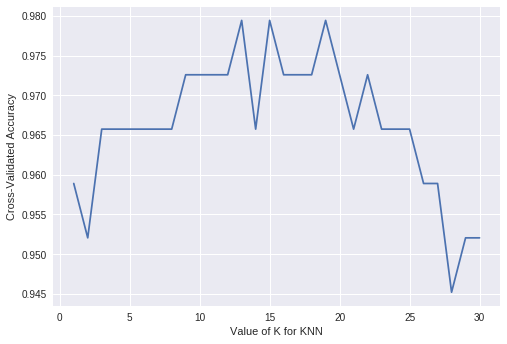

In [0]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [0]:
#Train the model on all the training points.
# Make predictions
from sklearn.metrics import accuracy_score

url = "http://datasciencemastery.in/wp-content/uploads/2018/07/iris_prediction_dataset.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

prediction_dataset = pandas.read_csv(url, names=names)
X_prediction = prediction_dataset.values[:,0:4]    #features



knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, Y)
predictions = knn.predict(X_prediction)


print ('Predictions',predictions)



Predictions ['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (4,4), fontsize=8):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig